In [10]:
#Package loading
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import statsmodels.api as sm
#Read excel file
file_path = r'D:\Derivatives Trading\Hang Seng ETF Data.xlsx'
df = pd.read_excel(file_path, index_col='Date', parse_dates=True)

# Display the first few rows of the DataFrame
print(df.head())

# Display summary statistics
print(df.describe())

# Check for null values
print(df.isnull().sum())

            7200 HK    3110 HK  Hang Seng Tech  Hang Seng Index
Date                                                           
2021-05-06   10.130  29.180000       8136.8701        28637.461
2021-05-07   10.170  29.459999       7954.8198        28610.650
2021-05-10   10.140  29.879999       7886.0200        28595.660
2021-05-11    9.675  29.660000       7649.6802        28013.811
2021-05-12    9.850  29.400000       7861.1802        28231.039
          7200 HK     3110 HK  Hang Seng Tech  Hang Seng Index
count  808.000000  808.000000      808.000000       808.000000
mean     5.076210   23.233255     4599.724276     20512.050161
std      2.140039    2.983521     1279.040696      3523.935381
min      2.322000   17.379999     2801.990000     14687.020000
25%      3.376000   20.875000     3757.220050     17745.195250
50%      4.417000   23.080000     4129.040000     19734.195500
75%      6.401250   25.564999     5106.072600     22720.979750
max     10.900000   30.059999     8305.740200   

In [11]:
# Calculate daily returns for '7200 HK', '3110 HK', and 'Hang Seng Index'
df['7200 HK Return'] = df['7200 HK'].pct_change()
df['3110 HK Return'] = df['3110 HK'].pct_change()
df['Hang Seng Tech Return'] = df['Hang Seng Tech'].pct_change()
df['Hang Seng Index Return'] = df['Hang Seng Index'].pct_change()

            7200 HK Return  3110 HK Return  Hang Seng Tech Return  \
Date                                                                
2021-05-06             NaN             NaN                    NaN   
2021-05-07        0.003949        0.009596              -0.022374   
2021-05-10       -0.002950        0.014257              -0.008649   
2021-05-11       -0.045858       -0.007363              -0.029969   
2021-05-12        0.018088       -0.008766               0.027648   

            Hang Seng Index Return  
Date                                
2021-05-06                     NaN  
2021-05-07               -0.000936  
2021-05-10               -0.000524  
2021-05-11               -0.020347  
2021-05-12                0.007754  


<Figure size 1200x600 with 0 Axes>

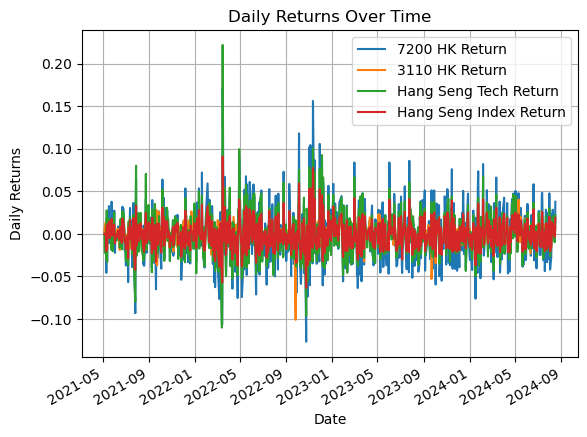

In [12]:
# Display the first few rows to verify the calculations
print(df[['7200 HK Return', '3110 HK Return', 'Hang Seng Tech Return', 'Hang Seng Index Return']].head())

df.fillna(0, inplace=True)  # This fills all NaN values with 0

plt.figure(figsize=(12, 6))
df[['7200 HK Return', '3110 HK Return', 'Hang Seng Tech Return', 'Hang Seng Index Return']].plot(title='Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.grid(True)
plt.show()

In [13]:
# Remove any NaN values that may affect the regression analysis
df = df.dropna()

# Prepare independent variable (add a constant term to allow statsmodels to fit an intercept)
X = sm.add_constant(df['Hang Seng Index Return'])  # Independent variable (Market returns)

# Prepare dependent variables
y_7200 = df['7200 HK Return']  # Dependent variable for 7200 HK
y_3110 = df['3110 HK Return']  # Dependent variable for 3110 HK
y_HSI_Tech=df['Hang Seng Tech Return']  # Dependent variable for Hang Seng Tech

In [19]:
# Run regression for 7200 HK
model_7200 = sm.OLS(y_7200, X)
results_7200 = model_7200.fit()

# Run regression for 3110 HK
model_3110 = sm.OLS(y_3110, X)
results_3110 = model_3110.fit()

# Run regression for Hang Seng Tech
model_HSI_Tech = sm.OLS(y_HSI_Tech, X)
results_HSI_Tech = model_HSI_Tech.fit()


In [20]:
# Print the summary of regression results
print("Regression results for 7200 HK:")
print(results_7200.summary())

Regression results for 7200 HK:
                            OLS Regression Results                            
Dep. Variable:         7200 HK Return   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 8.866e+04
Date:                Mon, 19 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:54:05   Log-Likelihood:                 3533.2
No. Observations:                 808   AIC:                            -7062.
Df Residuals:                     806   BIC:                            -7053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [21]:
print("\nRegression results for 3110 HK:")
print(results_3110.summary())


Regression results for 3110 HK:
                            OLS Regression Results                            
Dep. Variable:         3110 HK Return   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     893.4
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          1.06e-132
Time:                        17:54:05   Log-Likelihood:                 2677.6
No. Observations:                 808   AIC:                            -5351.
Df Residuals:                     806   BIC:                            -5342.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [22]:
print("\nRegression results for Hang Seng Tech:")
print(results_HSI_Tech.summary())


Regression results for Hang Seng Tech:
                              OLS Regression Results                             
Dep. Variable:     Hang Seng Tech Return   R-squared:                       0.872
Model:                               OLS   Adj. R-squared:                  0.872
Method:                    Least Squares   F-statistic:                     5493.
Date:                   Mon, 19 Aug 2024   Prob (F-statistic):               0.00
Time:                           17:54:07   Log-Likelihood:                 2635.3
No. Observations:                    808   AIC:                            -5267.
Df Residuals:                        806   BIC:                            -5257.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [23]:
#Based on the regression coefficients:
#Calibrated factor for delta exposure in 7200 HK would be 2 (2*the 1% delta exposure)
#Calibrated factor for delta exposure in 3110 HK would be  0.5789 (0.5789*the 1% delta exposure)
#Calibrated factor for delta exposure in Hang Seng Tech would be  1.5123 (1.5123*the 1% delta exposure)
#Note: Due to missing data problem, I use Hang Seng Tech index instead of 2837 HK which is the ETF for Hang Seng Tech